In [28]:
# import os

# def delete_folder_contents(folder_path):
#     for root, dirs, files in os.walk(folder_path, topdown=False):
#         for name in files:
#             file_path = os.path.join(root, name)
#             try:
#                 os.unlink(file_path)
#                 # print(f"Deleted file: {file_path}")
#             except Exception as e:
#                 print(f"Error deleting file: {file_path} - {e}")
#         for name in dirs:
#             dir_path = os.path.join(root, name)
#             try:
#                 os.rmdir(dir_path)
#                 print(f"Deleted empty directory: {dir_path}")
#             except Exception as e:
#                 print(f"Error deleting directory: {dir_path} - {e}")

# folder_path = "mutations"

# try:
#     delete_folder_contents(folder_path)
#     print(f"Successfully deleted contents of {folder_path}")
# except Exception as e:
#     print(f"Error: {e}")


In [29]:
aa = 'ACDEFGHIKLMNPQRSTVWY'
def generate_mutated_sequences(sequence, tree, current_mutations=0, prefix="", max_mutations=3):
    mutated_sequences = set()
    if current_mutations == max_mutations:
        return sequence
    
    for i in range(len(sequence)):
        for mutated_aa in aa:
            if mutated_aa in tree and mutated_aa != sequence[i]:
                mutated_sequence = list(sequence)
                mutated_sequence[i] = mutated_aa
                tree = {key: value for subdict in tree.values() for key, value in subdict.items()}
                sub_sequences = generate_mutated_sequences(sequence[i+1:], tree, current_mutations=1, prefix=[mutated_sequence[:i+1]])
                print()
                
                

In [30]:
# Example usage
tree = {'A': {'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}}
sequence = 'ADCA'
mutations = generate_mutated_sequences(sequence, tree, max_mutations=3)

In [31]:
def generate_mutated_sequences(sequence, tree, max_mutations=3, current_mutations=0):
    mutated_sequences = set()
    aa = 'ACDEFGHIKLMNPQRSTVWY'
    prefix = ""
    if current_mutations > max_mutations:
        return []
    
    suffix = sequence

    for i in range(len(sequence)):
        for replace_aa in aa:
            if replace_aa in tree and replace_aa!=sequence[i]:
                mutated_sequence = list(sequence)
                mutated_sequence[i] = replace_aa
                # mutated_sequences.add(''.join(mutated_sequence))
                val = generate_mutated_sequences(''.join(mutated_sequence), tree[replace_aa], max_mutations, current_mutations + 1)
                mutated_sequences.union(val)
        tree = {key: value for subdict in tree.values() for key, value in subdict.items()}
        prefix = sequence[:i+1]
        suffix = sequence[i+1:]
    return mutated_sequences

# Example usage
tree = {'A': {'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}}
sequence = 'ADCA'
mutations = generate_mutated_sequences(sequence, tree, max_mutations=3)
print(mutations)


set()


In [1]:
ls = ['ACDE', 'AAFG', 'ACFG']
tree = {}

for item in ls:
    t = tree
    for part in list(item):
        t = t.setdefault(part, {})

In [2]:
tree

{'A': {'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}}

In [33]:
def generate_mutated_sequences(sequence, tree, max_mutations=3, current_mutations=0):
    mutated_sequences = set()
    aa = 'ACDEFGHIKLMNPQRSTVWY'
    if current_mutations > max_mutations:
        return mutated_sequences
    
    for i in range(len(sequence)):
        for replace_aa in aa:
            if replace_aa in tree and replace_aa != sequence[i]:
                mutated_sequence = list(sequence)
                mutated_sequence[i] = replace_aa
                mutated_sequence_str = ''.join(mutated_sequence)
                if len(tree[replace_aa]) > 0:
                    mutated_sequences.add(mutated_sequence_str)
                    mutated_sequences.update(generate_mutated_sequences(mutated_sequence_str, tree[replace_aa], max_mutations, current_mutations + 1))
                
    return mutated_sequences

# Example usage
tree = {'A': {'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}}
sequence = 'ADCA'
mutations = generate_mutated_sequences(sequence, tree, max_mutations=3)
print(mutations)


{'FDAA', 'AAAF', 'DDAA', 'AAFA', 'AACF', 'ADAC', 'AACD', 'ACDA', 'ADDC', 'ADAD', 'DDCA', 'CDAA', 'FDCA', 'DCCA', 'DACA', 'CAFA', 'CADA', 'CACD', 'CDFA', 'ADDA', 'ACFA', 'ADCC', 'CDAF', 'FACA', 'ACAF', 'ADFC', 'CDAD', 'FAAA', 'AACA', 'AFCA', 'AACC', 'CDCA', 'CFAA', 'AFAC', 'ACCF', 'ADCA', 'AAAA', 'CFCA', 'FCCA', 'AFAA', 'DACC', 'AFCC', 'ADAA', 'CACA', 'FCAA', 'ADCF', 'CDDA', 'DDAC', 'FACC', 'AAFC', 'ACAA', 'ACCA', 'ADAF', 'DCAA', 'AADC', 'CACF', 'ACAD', 'ADCD', 'FDAC', 'ADFA', 'ACCD'}


In [34]:
ls = ['ACDE', 'AAFG', 'ACFG']

In [35]:
def generate_mutated_sequences(sequence, tree, max_mutations=3, current_mutations=0):
    mutated_sequences = set()
    aa = 'ACDEFGHIKLMNPQRSTVWY'
    if current_mutations > max_mutations:
        return mutated_sequences
    
    for i in range(len(sequence)):
        for replace_aa in aa:
            if replace_aa in tree:
                if replace_aa != sequence[i]:
                    current_mutations += 1
                    print(tree)
                    generate_mutated_sequences(sequence[i:], tree[replace_aa], current_mutations=current_mutations)
                    
    #             mutated_sequence = list(sequence)
    #             mutated_sequence[i] = replace_aa
    #             mutated_sequence_str = ''.join(mutated_sequence)
    #             if len(tree[replace_aa]) > 0:
    #                 mutated_sequences.add(mutated_sequence_str)
    #                 mutated_sequences.update(generate_mutated_sequences(mutated_sequence_str, tree[replace_aa], max_mutations, current_mutations + 1))
                
    # return mutated_sequences

# Example usage
tree = {'A': {'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}}
sequence = 'ADCA'
mutations = generate_mutated_sequences(sequence, tree, max_mutations=3)
print(mutations)

{'A': {'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}}
{'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}
{'F': {'G': {}}}
{'G': {}}
{'G': {}}
{'G': {}}
{'F': {'G': {}}}
{'F': {'G': {}}}
{'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}
{'D': {'E': {}}, 'F': {'G': {}}}
{'D': {'E': {}}, 'F': {'G': {}}}
{'D': {'E': {}}, 'F': {'G': {}}}
{'D': {'E': {}}, 'F': {'G': {}}}
{'D': {'E': {}}, 'F': {'G': {}}}
{'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}
{'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}
{'A': {'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}}
{'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}
{'F': {'G': {}}}
{'F': {'G': {}}}
{'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}
None


In [36]:
print(tree)
{'A': {'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}}

{'A': {'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}}


{'A': {'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}}

In [37]:
def calculate_changes(tree, new_sequence):
    changes = {}
    for sequence in tree.keys():
        changes[sequence] = calculate_changes_helper(tree[sequence], new_sequence)
    return changes

def calculate_changes_helper(subtree, sequence):
    if not sequence:
        return 0
    first_char = sequence[0]
    if first_char not in subtree or not subtree[first_char]:  # Check if subtree is empty
        return len(sequence)
    return min(1 + calculate_changes_helper(subtree[first_char], sequence[1:]),  # Change current character
               calculate_changes_helper(subtree, sequence[1:]))  # Keep current character

ls = ['ACDE', 'AAFG', 'ACFG']
tree = {'A': {'C': {'D': {'E': {}}, 'F': {'G': {}}}, 'A': {'F': {'G': {}}}}}
new_sequence = "ACEG"

changes = calculate_changes(tree, new_sequence)
print(changes)  # Output: {'ACDE': 3, 'AAFG': 2, 'ACFG': 1}


{'A': 2}


In [38]:
import csv 
def truncate_sequences(args):
    csv_file, column_name, right, left = args
    sequences_set = set()
    with open(csv_file, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            sequence = row[column_name].strip()
            start_index = max(0, len(sequence)//2 - left)
            end_index = min(len(sequence), len(sequence)//2 + right)
            sequences_set.add(sequence[start_index:end_index])
    return sequences_set

In [39]:
# 1000 sequences
sequences_file = 'files/forchen_F_26L.csv'
sequences_header = "cdr3_amino_acid"

sequences_set = truncate_sequences((sequences_file, sequences_header, 4, 4))


In [40]:
from Levenshtein import distance

def find_strings_within_distance(strings, new_string, max_distance=1):
    return [string for string in strings if string != new_string and distance(string, new_string) <= max_distance]

# Example usage
list_of_strings = sequences_set
for seq in sequences_set:
    result = find_strings_within_distance(list_of_strings, seq, max_distance=1)
    if result:
        print(seq, result)

PLAGGDTG ['PLAGGSTG']
FTGVSSYN ['YTGVSSYN']
QENAGRHL ['QENAGRHS']
FDGGSSYN ['FVGGSSYN']
LGPSAGQE ['LGPSGGQE']
LGGTGGSY ['LGGTGGSQ']
LAGGPNTG ['LAGGMNTG']
QGPAGGQE ['QGPSGGQE']
LDGRGSSY ['SDGRGSSY']
LGLAGGGE ['LGLAGGLE']


RLAGGLTD ['RVAGGLTD']
FVGGSSYN ['FDGGSSYN']
LGGGYSNQ ['LSGGYSNQ']
SSGGSNTG ['SPGGSNTG']
LSGGAGAN ['DSGGAGAN']
YTGLSSYN ['YTGVSSYN']
LGLAGGTD ['LALAGGTD']
DSGGAGAN ['LSGGAGAN']
LSGGYSNQ ['LGGGYSNQ']
LALAGGTD ['LGLAGGTD']
LVAGGGTD ['LVAGPGTD']
IGLAGDTD ['PGLAGDTD']
PLAGGSTG ['PLAGGDTG']
LGPSGGQE ['LGPSAGQE', 'QGPSGGQE']
RVAGGLTD ['RLAGGLTD']
LGLAGGLE ['LGLAGGGE', 'LGLAGGLY']
LVAGPGTD ['LVAGGGTD']
SPGGSNTG ['SSGGSNTG']
LGLAGGLY ['LGLAGGLE']
QGPSGGQE ['QGPAGGQE', 'LGPSGGQE']
LGGTGGSQ ['LGGTGGSY']
QDRAGGNQ ['QDRTGGNQ']
YTGVSSYN ['FTGVSSYN', 'YTGLSSYN']
SDGRGSSY ['LDGRGSSY']
QENAGRHS ['QENAGRHL']
PGLAGDTD ['IGLAGDTD']


KeyboardInterrupt: 

In [ ]:
# 1000 sequences
sequences_file = 'files/forchen_F_26L.csv'
sequences_header = "cdr3_amino_acid"

DNA = list(truncate_sequences((sequences_file, sequences_header, 4, 4)))

In [ ]:
import requests
import Levenshtein as L
import re

def download_moby_dick():
    moby_dick_url = 'https://www.gutenberg.org/files/2701/2701-0.txt'
    return requests.get(moby_dick_url).text

def sentences_in_book(book):
    sentences = (s for s in re.split(r'[.;?!]\s|\r\n\r\n', book))
    sentences = (re.sub('\s+', ' ', s).strip() for s in sentences)
    sentences = (s for s in sentences if len(s) > 10)
    return list(sentences)

sentences = DNA

# sort by length
sentences.sort(key=len)

# median length sentence
target = ["YTGVSSYN"]

# sort by levenshtein distance to target
def keyfunc(sentence):
    return L.distance(target, sentence) 

sentences.sort(key=keyfunc)

In [ ]:
from collections import defaultdict


def hamming_distance(s1, s2):
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

words = DNA
cutoff = 1  # Maximum number of changes allowed
couples = defaultdict(list)
for seq in words:
    close_matches = [word for word in words if word != seq and hamming_distance(seq, word) <= cutoff]
    for mut in close_matches:
        couples[seq].append([mut,hamming_distance(seq, mut)]) 

KeyboardInterrupt: 

In [ ]:
couples["LGGTYSTD"]

[]

In [ ]:
import difflib
words = DNA
for seq in words:
    close_matches = difflib.get_close_matches(seq, words, n=4, cutoff=0.7)
    close_matches.remove(seq)
    if close_matches:
        print(seq, close_matches)

KVGRQNTG ['VLGQGNTG', 'PKGVGNTG']
QVVTGGYN ['QEGTGGYN']
QDGGATGN ['QVGGARTG', 'QGPGTGYN', 'QGAGTSGN']
FVTGFNTG ['VTGTMNTG']
PGLAGGRE ['QGLAGGPE', 'PGLGHQGR', 'PELAGGYE']
LSGTGNFY ['SGTGSLFY', 'LSRGTGVF', 'LSGTSGSY']
NAAGARVE ['KAAGARDE']
LQSSGSAD ['PLSGSATD']
QPRQGRQE ['QDPRQGLE', 'ARQGRLQE']
QFPGGVGN ['QDPGGGYN']
YRGAGLSY ['LRGTALSY', 'LGAGLSSY']
ARRALSSY ['RKRLSSYN']
QEGTGGYN ['QVVTGGYN', 'QGTGTGAN', 'QGPGTGYN']
DSHGFSYN ['DPSGAFYN']
KAAGARDE ['NAAGARVE']
QGLAGENY ['QGLAGGYN', 'QGLAGGPE', 'QGGGERNY']
LGTGRTGQ ['LIGGRYTG', 'LGYGVRTG', 'LGTGWRTD']
THRGRVGS ['THRGRVLE']
SWTESSYN ['STELSSYN', 'YSTDSSYN', 'WTSGGSYN']
YYGGYSNQ ['LSGGYSNQ', 'LGGGYSNQ', 'AEGGYSNQ']
QDWGTPYN ['QDWGPSYY', 'QDWADTYN']
PVAGGQTD ['SVAGRGTD', 'RVAGGLTD', 'PILAGGTD']
EKGLSAPD ['EQGKGLAD']
QGLGSGAN ['SLRGSGAN', 'SIQGSGAN', 'QGTGTGAN']
IDLGGGRE ['LGGRGGRE']
DPGPSDPY ['DLPQGPPY']
RAPGGGTD ['RVAGGLTD', 'RPSGGGVD', 'RLAGGLTD']
LGQGVSNQ ['LAGQGVSN', 'VPGQGSNQ', 'SLGAGSNQ']
LGRNPTNE ['LVRPATNE', 'LGLDPTNE', 'LGFRGTNE']
RA

In [ ]:
import pandas as pd
import numpy as np

distances_csv = "distance_matrix.csv"
distances_df = pd.read_csv(distances_csv, index_col=0)
distances_dict = {(aa1, aa2): distances_df.loc[aa1, aa2] for aa1 in distances_df.index for aa2 in distances_df.columns}
min_distance = min(distances_dict.values())
max_distance = max(distances_dict.values())
normalized_distances_dict = {(aa1, aa2): (distance - min_distance) / (max_distance - min_distance) for (aa1, aa2), distance in distances_dict.items()}


strings_set = set(truncate_sequences((sequences_file, sequences_header, 4, 4)))
new_string = "VPGQGSNQ"


strings_array = np.array(list(strings_set))
distances = np.array([sum(s1 != s2 for s1, s2 in zip(s, new_string)) for s in strings_array])
indices = np.where(distances <= 1)[0]
set(strings_array[indices]) - {new_string}

set()

In [ ]:
from tqdm import tqdm

distances_csv = "distance_matrix.csv"
distances_df = pd.read_csv(distances_csv, index_col=0)
distances_dict = {(aa1, aa2): distances_df.loc[aa1, aa2] for aa1 in distances_df.index for aa2 in distances_df.columns}


def custom_distance(seq1, seq2):
    # Calculate the total distance based on the substitution costs
    dist = sum(distances_dict.get((c1, c2), 0) for c1, c2 in zip(seq1, seq2))
    return dist

# Sample list of sequences
sequences = list(strings_set)

# Calculate custom distance between each pair of sequences
distances = np.zeros((len(sequences), len(sequences)))

for i in tqdm(range(len(sequences))):
    for j in range(i, len(sequences)):
        dist = custom_distance(sequences[i], sequences[j])
        distances[i, j] = dist
        distances[j, i] = dist

distances_df = pd.DataFrame(distances, index=sequences, columns=sequences)
print(distances_df)

  0%|          | 0/1178 [00:00<?, ?it/s]

 50%|█████     | 589/1178 [00:10<00:10, 54.66it/s] 


IndexError: list index out of range

In [ ]:
a = {1,2,3}
b = a

In [ ]:
b = a.copy()
a.remove(1)
b

{1, 2, 3}

In [4]:
d1 = {"PLAGGDTG": [["PLAGGSTG", 2.296208831966291]], "FDGGSSYN": [["FVGGSSYN", 4.679025005276206]], "RLAGGLTD": [["RVAGGLTD", 1.284128108873877]], "RVAGGLTD": [["RLAGGLTD", 1.284128108873877]], "QENAGRHL": [["QENAGRHS", 4.503236946908301]], "QENAGRHS": [["QENAGRHL", 4.503236946908301]], "LGPSGGQE": [["QGPSGGQE", 3.274172567229773], ["LGPSAGQE", 4.264347429560588]], "LGLAGGGE": [["LGLAGGLE", 4.930536279148547]], "LGGTGGSY": [["LGGTGGSQ", 7.080831589580423]], "LALAGGTD": [["LGLAGGTD", 4.264347429560588]], "LGPSAGQE": [["LGPSGGQE", 4.264347429560588]], "YTGLSSYN": [["YTGVSSYN", 1.284128108873877]], "LVAGPGTD": [["LVAGGGTD", 4.647090057229363]], "SDGRGSSY": [["LDGRGSSY", 4.503236946908301]], "PLAGGSTG": [["PLAGGDTG", 2.296208831966291]], "QGPAGGQE": [["QGPSGGQE", 5.541561151877691]], "FVGGSSYN": [["FDGGSSYN", 4.679025005276206]], "LGGTGGSQ": [["LGGTGGSY", 7.080831589580423]], "LGLAGGTD": [["LALAGGTD", 4.264347429560588]], "LAGGMNTG": [["LAGGPNTG", 6.110288863875422]], "YTGVSSYN": [["YTGLSSYN", 1.284128108873877], ["FTGVSSYN", 2.545205885581754]], "QDRAGGNQ": [["QDRTGGNQ", 3.769443725538293]], "PGLAGDTD": [["IGLAGDTD", 5.286936447509087]], "LGLAGGLY": [["LGLAGGLE", 3.932187686263208]], "SPGGSNTG": [["SSGGSNTG", 3.476415251376049]], "SSGGSNTG": [["SPGGSNTG", 3.476415251376049]], "LGLAGGLE": [["LGLAGGLY", 3.932187686263208], ["LGLAGGGE", 4.930536279148547]], "IGLAGDTD": [["PGLAGDTD", 5.286936447509087]], "LSGGYSNQ": [["LGGGYSNQ", 7.71431079228728]], "FTGVSSYN": [["YTGVSSYN", 2.545205885581754]], "LVAGGGTD": [["LVAGPGTD", 4.647090057229363]], "LAGGPNTG": [["LAGGMNTG", 6.110288863875422]], "LGGGYSNQ": [["LSGGYSNQ", 7.71431079228728]], "QDRTGGNQ": [["QDRAGGNQ", 3.769443725538293]], "DSGGAGAN": [["LSGGAGAN", 4.280608367977617]], "LSGGAGAN": [["DSGGAGAN", 4.280608367977617]], "LDGRGSSY": [["SDGRGSSY", 4.503236946908301]], "QGPSGGQE": [["LGPSGGQE", 3.274172567229773], ["QGPAGGQE", 5.541561151877691]]}
d2 = {'LVAGPGTD': [['LVAGGGTD', 4.647090057229363]], 'QGPAGGQE': [['QGPSGGQE', 5.541561151877691]], 'LSGGYSNQ': [['LGGGYSNQ', 7.71431079228728]], 'FDGGSSYN': [['FVGGSSYN', 4.679025005276206]], 'LGLAGGLE': [['LGLAGGGE', 4.930536279148547]], 'PLAGGSTG': [['PLAGGDTG', 2.296208831966291]], 'DSGGAGAN': [['LSGGAGAN', 4.280608367977617]], 'LALAGGTD': [['LGLAGGTD', 4.264347429560588]], 'LGLAGGLY': [['LGLAGGLE', 3.932187686263208]], 'LAGGMNTG': [['LAGGPNTG', 6.110288863875422]], 'LGPSAGQE': [['LGPSGGQE', 4.264347429560588]], 'LGGTGGSY': [['LGGTGGSQ', 7.080831589580423]], 'SPGGSNTG': [['SSGGSNTG', 3.476415251376049]], 'YTGLSSYN': [['YTGVSSYN', 1.284128108873877]], 'IGLAGDTD': [['PGLAGDTD', 5.286936447509087]], 'FTGVSSYN': [['YTGVSSYN', 2.545205885581754]], 'LGPSGGQE': [['QGPSGGQE', 3.274172567229773]], 'QENAGRHL': [['QENAGRHS', 4.503236946908301]], 'SDGRGSSY': [['LDGRGSSY', 4.503236946908301]], 'RLAGGLTD': [['RVAGGLTD', 1.284128108873877]], 'QDRTGGNQ': [['QDRAGGNQ', 3.769443725538293]], 'PGLAGDTD': [['IGLAGDTD', 5.286936447509087]], 'RVAGGLTD': [['RLAGGLTD', 1.284128108873877]], 'LGLAGGTD': [['LALAGGTD', 4.264347429560588]], 'LGLAGGGE': [['LGLAGGLE', 4.930536279148547]], 'QENAGRHS': [['QENAGRHL', 4.503236946908301]], 'YTGVSSYN': [['YTGLSSYN', 1.284128108873877], ['FTGVSSYN', 2.545205885581754]], 'SSGGSNTG': [['SPGGSNTG', 3.476415251376049]], 'LVAGGGTD': [['LVAGPGTD', 4.647090057229363]], 'LGGGYSNQ': [['LSGGYSNQ', 7.71431079228728]], 'PLAGGDTG': [['PLAGGSTG', 2.296208831966291]], 'FVGGSSYN': [['FDGGSSYN', 4.679025005276206]], 'LAGGPNTG': [['LAGGMNTG', 6.110288863875422]], 'QDRAGGNQ': [['QDRTGGNQ', 3.769443725538293]], 'LSGGAGAN': [['DSGGAGAN', 4.280608367977617]], 'QGPSGGQE': [['LGPSGGQE', 3.274172567229773], ['QGPAGGQE', 5.541561151877691]], 'LGGTGGSQ': [['LGGTGGSY', 7.080831589580423]], 'LDGRGSSY': [['SDGRGSSY', 4.503236946908301]]}

In [7]:
d1.keys()

dict_keys(['PLAGGDTG', 'FDGGSSYN', 'RLAGGLTD', 'RVAGGLTD', 'QENAGRHL', 'QENAGRHS', 'LGPSGGQE', 'LGLAGGGE', 'LGGTGGSY', 'LALAGGTD', 'LGPSAGQE', 'YTGLSSYN', 'LVAGPGTD', 'SDGRGSSY', 'PLAGGSTG', 'QGPAGGQE', 'FVGGSSYN', 'LGGTGGSQ', 'LGLAGGTD', 'LAGGMNTG', 'YTGVSSYN', 'QDRAGGNQ', 'PGLAGDTD', 'LGLAGGLY', 'SPGGSNTG', 'SSGGSNTG', 'LGLAGGLE', 'IGLAGDTD', 'LSGGYSNQ', 'FTGVSSYN', 'LVAGGGTD', 'LAGGPNTG', 'LGGGYSNQ', 'QDRTGGNQ', 'DSGGAGAN', 'LSGGAGAN', 'LDGRGSSY', 'QGPSGGQE'])

In [8]:
d2.keys()

dict_keys(['LVAGPGTD', 'QGPAGGQE', 'LSGGYSNQ', 'FDGGSSYN', 'LGLAGGLE', 'PLAGGSTG', 'DSGGAGAN', 'LALAGGTD', 'LGLAGGLY', 'LAGGMNTG', 'LGPSAGQE', 'LGGTGGSY', 'SPGGSNTG', 'YTGLSSYN', 'IGLAGDTD', 'FTGVSSYN', 'LGPSGGQE', 'QENAGRHL', 'SDGRGSSY', 'RLAGGLTD', 'QDRTGGNQ', 'PGLAGDTD', 'RVAGGLTD', 'LGLAGGTD', 'LGLAGGGE', 'QENAGRHS', 'YTGVSSYN', 'SSGGSNTG', 'LVAGGGTD', 'LGGGYSNQ', 'PLAGGDTG', 'FVGGSSYN', 'LAGGPNTG', 'QDRAGGNQ', 'LSGGAGAN', 'QGPSGGQE', 'LGGTGGSQ', 'LDGRGSSY'])

In [10]:
def hamming_distance(seq, sequences_set, limit):
    def get_distance(seq1, seq2):
        distance = 0
        for c1, c2 in zip(seq1, seq2):
            if c1 != c2:
                distance += 1
                if distance > limit:
                    return False
        return distance
    close = set()
    for var in sequences_set:
        if get_distance(var, seq):
            close.add(var)
    return close

In [13]:
hamming_distance("AAAA", ["DDAD", "AAAF", "AADD"], 1)

{'AAAF'}

In [22]:
from Bio import pairwise2
alignments = pairwise2.align.globalxx("ACA", "ACG")

In [23]:
alignments

[Alignment(seqA='ACA-', seqB='AC-G', score=2.0, start=0, end=4),
 Alignment(seqA='ACA', seqB='ACG', score=2.0, start=0, end=3)]

In [18]:
alignments[0].score

2.0

In [27]:
a = "AAAB"
b = "AAAA"

from difflib import SequenceMatcher
SequenceMatcher(None, a, b).ratio()

0.75

In [ ]:
ls = ['ACDE', 'AAFG', 'ACFG']
tree = {}

for item in ls:
    t = tree
    for part in list(item):
        t = t.setdefault(part, {})

In [16]:
def create_tree(sequences):
    tree = {}
    for sequence in sequences:
        current_dict = tree
        for letter in sequence:
            current_dict = current_dict.setdefault(letter, {})
    return tree

def traverse_tree(tree, sequence, max_diff, path="", current_diff=0, depth=0):
    if current_diff > max_diff:
        return []
    
    if not tree:
        return [path] if current_diff <= max_diff else []
    
    matching_sequences = []
    for char, subtree in tree.items():
        new_diff = current_diff + (1 if (depth < len(sequence) and char != sequence[depth]) else 0)
        matching_sequences.extend(traverse_tree(subtree, sequence, max_diff, path + char, new_diff, depth + 1))
    
    return matching_sequences

def find_sequences_within_distance(tree, sequence, max_diff):
    return traverse_tree(tree, sequence, max_diff)

# Example usage
sequences = ['ACDE', 'AAFG', 'ACFG', "AAAA"]
tree = create_tree(sequences)
new_sequence = 'AAFC'
max_diff = 4
result = find_sequences_within_distance(tree, new_sequence, max_diff)
print(result)


['ACDE', 'ACFG', 'AAFG', 'AAAA']


In [ ]:
    # 1000 sequences
    sequences_file = 'files/forchen_F_26L.csv'
    sequences_headers = ["cdr3_amino_acid"]

In [13]:
import networkx as nx
G = nx.Graph()

In [11]:
G.add_nodes_from([2, 3])


In [14]:
edges = [(2,1),(2,2),(3,2),(4,3),(6,4),(7,5),(14,5)]
G.add_edges_from(edges)

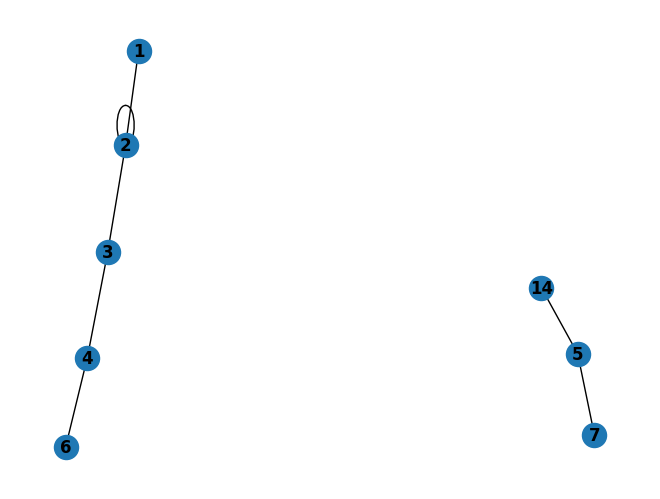

In [15]:
nx.draw(G, with_labels=True, font_weight='bold')
import matplotlib.pyplot as plt
plt.show()

In [8]:
import pandas as pd
data = pd.read_csv("files/vdjdb_cdr3.csv")
data = data[data["vdjdb.score"] == 3]

cdr3_header = "cdr3"
epitope_header = "antigen.epitope"


In [9]:
# Step 1: Group by 'cdr3' and 'antigen.epitope', and count occurrences
epitope_counts = data.groupby(['cdr3', 'antigen.epitope']).size().reset_index(name='count')

# Step 2: Get the most frequent epitope for each 'cdr3'
most_frequent_epitopes = epitope_counts.loc[epitope_counts.groupby('cdr3')['count'].idxmax()]

# Step 3: Merge with the original dataframe to retain only the most frequent epitopes
df_filtered = data.merge(most_frequent_epitopes[['cdr3', 'antigen.epitope']], on=['cdr3', 'antigen.epitope'])
